# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Marcos Ignacio Huenchumil Illanes
- Nombre de alumno 2: 

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/onemoremoka/MDS7202labs)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.




### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento se usan para ajustar el modelo. En cambio los datos de validación e usna para evaluar el rendimiento al termino de cada epoca. Los datos de validación no intervienen en el entrenamiento pero si ayuda a afinar los hiperparámetrosy evitar el sobreajuste.

2. El principal desafío es que no se tiene un ground_truth, lo que implica que no existe una respuesta esperada, dificultando validar las predicciones de un modelo como correctas. Por ejemplo técnicas de clustering (ej: DBSCAN) agrupan datos basados en similitud, pero sin métricas claras de desempeño, es complejo validar si las agrupaciones son significativas.

3. La matriz de confusión es una métrica para evaluar el rendimiento de modelos de clasificación. A algún set de datos (train/val/test) se comparan todas las clases reales (y_true) con las predicciones realizadas (y_pred) de forma que en la diagonal principal se encuentran los (TP + TN) y fuera de la diogonal los errores de clasificación (FP y FN). Facilita visualizar el rendimiento general y por clases particulares.

4. Accuracy = (TP + TN)/ (TP+TN+FP+FN): Es las predicciones correctas sobre el total de predicciones, es decir, el porcentaje de predicciones correctas.

Precision = TP/(TP+FP):  predicciones correctas sobre el total de predicciones positivas, es decir, el porcentaje de mis predicciones positivas que realmente eran positivas.

Recall = TP/(TP+FN): predicciones correctas sobre el total de clases positivas,  es decir, el porcentaje de verdaderos positivos clasificados correctamente.

F1_score = 2* Presion x Recall /(Precision + Recall) Es la media armónica entre las métricas de Precision y Recall. Representa un tradeoff entre ambas métricas. Entre más cercana sea de 1, generara menos falsos positivos (precision alta) y captura la mayoria de los casos relevante de clase positiva (recall alto).

5. Mantenimiento predictivo: recall dado que es improtante indentificar todas las posibles fallas a pesar de que algunas sean falsas alarmas (FP).

Detección de enfermedades contagiosas: recall por la misma razón anterior

Aprobación de créditos de alto riesgo: Precision dado que si importantan los FP. asignar un crédito riesgoso a una persona que no cumple los requisitos tinee graves consecuencias económicas.

Detección de crimenes: F1_score caso más complejo se necesita tener un equilibrio entre identificar crímenes y acusar erróneamente.

# Parte práctica [48 puntos]

<p align="center">
  <img src="laboratorio5/uc.png"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [2]:
import pandas as pd

df = pd.read_csv("stats_players.csv")
df.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


In [3]:
df.columns

Index(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Height',
       'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys'],
      dtype='object')

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

**Respuesta**: La clase 1 son jugadores que fueron llamados para representar a su país. Mientran la clase 0 (jugadores NaN) no fueron seleccionados.

In [4]:
df['label'] = df['National_Position'].notna().astype(int)

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

**Respuesta**: clase 1 tiene 1075 registros. clase 0 tiene 16513 registros.

In [5]:
df['label'].value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Columnas numéricas (estadísticas físicas y técnicas)
numeric_features = [
    'Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control',
    'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
    'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing',
   'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength',
    'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
    'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'
]

numeric_transformer = StandardScaler()
# Columnas categóricas (nominales)
categorical_features = [
    'Nationality', 'Club_Position', 'Preffered_Foot', 'Work_Rate'
]

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear el ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [7]:
col_transformer 

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Height', 'Weight', 'Age', 'Weak_foot',
                                  'Skill_Moves', 'Ball_Control', 'Dribbling',
                                  'Marking', 'Sliding_Tackle',
                                  'Standing_Tackle', 'Aggression', 'Reactions',
                                  'Interceptions', 'Vision', 'Composure',
                                  'Crossing', 'Short_Pass', 'Long_Pass',
                                  'Acceleration', 'Speed', 'Stamina',
                                  'Strength', 'Balance', 'Agility', 'Jumping',
                                  'Heading', 'Shot_Power', 'Finishing',
                                  'Long_Shots', 'Curve', ...]),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Nationality', 'Club_Position',
                                  'Preffered_Foot', 'Work_Rate'])])

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta**: Se separan las **variables relevantes** en variables categóricas y numéricas.

Para las variables numéricas se usa un StandardScaler lo cual rescala todas las columnas a tener media = 0 y desviación estándar = 1. Esto es importante para que el modelo no se sobreajuste sobre ciertas variables en una escala mayor.

Se consideran variables categoricas relevantes:
  ```Nationality```, ```Club_Position```, ```Preffered_Foot```, ```Work_Rate```. Ninguna de estas variables son ordinales, es decir, una nacioanlidad sobre otra o un posición de jugador sobre otra etc. Para codificar a una representación vectorial se usa OneHotEncoder.


### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]

    **Respuesta**:

In [8]:
from sklearn.model_selection import train_test_split

SEED = 42
X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)
y_train.value_counts(), y_test.value_counts()

(label
 0    13210
 1      860
 Name: count, dtype: int64,
 label
 0    3303
 1     215
 Name: count, dtype: int64)

2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

In [9]:
!pip install xgboost lightgbm

In [10]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Pipeline con XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocessing', col_transformer),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=SEED))
])

# Pipeline con LightGBM
pipeline_lightgbm = Pipeline(steps=[
    ('preprocessing', col_transformer),
    ('classifier', LGBMClassifier(random_state=SEED))
])


3. Entrene los pipelines. [1 punto]

In [11]:
pipeline_xgboost.fit(X_train, y_train) # XGBoost

/home/ignacio/miniconda3/envs/lab/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [23:19:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Streng...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [12]:
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2676
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nationality',
                                                   'Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate'])])),
                ('classifier', LGBMClassifier(random_state=42))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]


In [13]:
y_pred_xgb = pipeline_xgboost.predict(X_test)
y_pred_lgbm = pipeline_lightgbm.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Métricas para XGBoost
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print("XGBoost")
print(f"Accuracy: {acc_xgb:.3f}")
print(f"Precisión: {prec_xgb:.3f}")
print(f"Recall: {recall_xgb:.3f}")
# print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Métricas para LightGBM
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
prec_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)

print("\nLightGBM")
print(f"Accuracy: {acc_lgbm:.3f}")
print(f"Precisión: {prec_lgbm:.3f}")
print(f"Recall: {recall_lgbm:.3f}")


XGBoost
Accuracy: 0.949
Precisión: 0.636
Recall: 0.381

LightGBM
Accuracy: 0.950
Precisión: 0.675
Recall: 0.358


In [15]:
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, digits=3))

Classification Report:
               precision    recall  f1-score   support

           0      0.961     0.986     0.973      3303
           1      0.636     0.381     0.477       215

    accuracy                          0.949      3518
   macro avg      0.798     0.684     0.725      3518
weighted avg      0.941     0.949     0.943      3518



In [16]:
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm, digits=3))

Classification Report:
               precision    recall  f1-score   support

           0      0.959     0.989     0.974      3303
           1      0.675     0.358     0.468       215

    accuracy                          0.950      3518
   macro avg      0.817     0.673     0.721      3518
weighted avg      0.942     0.950     0.943      3518



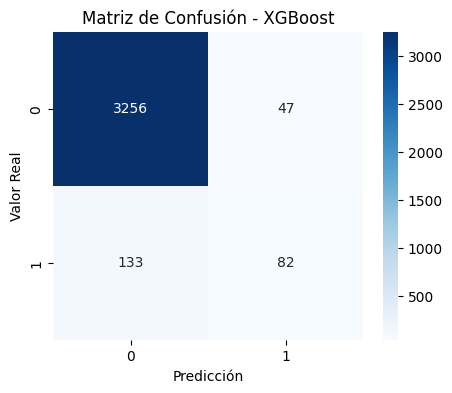

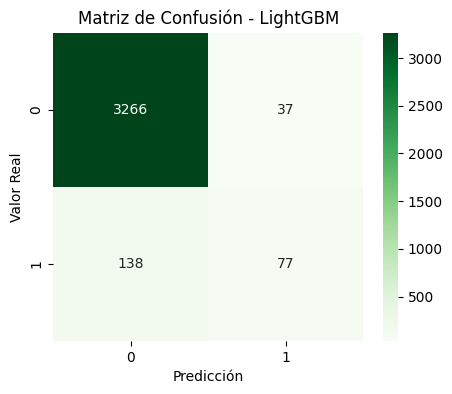

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión para XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Matriz de confusión para LightGBM
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - LightGBM')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

**Respuesta**: 

XGBoost
Accuracy: 0.949

Precisión: 0.636

Recall: 0.381

LightGBM
Accuracy: 0.950

Precisión: 0.675

Recall: 0.358

Ambos modelos tienen un alto accuracy (~95%) lo cual indica que en su mayoría las predicciones fueron correctas. Esta métrica es muy superificial dado que considera una buena clasificación de clases negativas y positivas, por tanto, al existir una diferencia de clases (como en este caso) la predicción sobre una clase domina el valor de la métrica. 

Precision (XGBoost=0.636 y LightGBM=0.675) Esta métrica considera de mi total de prodicciones cuantas realmente fueron clase positiva. Por tanto un valor medio sugiere que existe una gran cantidad de falsos positivos.

Recall (XGBoost=0.381 y LightGBM=0.358) Esta métrica considera los clasificados correctamente de los jugadores con son seleccionados nacionales. Un valor bano siguiere una lata cnatidad de falsos positivos. Por tanto existe demasiados jugadores que no son seleccionados y estan siendo clasificados como seleccionados.


3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta**: Nuestro modelo de clasificación busca, en base a características físicas y técnicas de los jugadores, predecir si un jugador ha sido seleccionado para representar a su pais. Por tanto la métrica que nos interesa es el recall. debido a que nos interesa identificar correctamente a la mayor cantidad de jugadores seleccionados, a pesar de tener algunso falsos positivos. Por tanto en este caso el mejor modelo es XGBoost.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.

In [18]:
posicion_map = {
    'ST': 'ataque', 'CF': 'ataque',
    'RW': 'central_ataque', 'CAM': 'central_ataque', 'LW': 'central_ataque',
    'RM': 'central', 'CM': 'central', 'LM': 'central',
    'RWB': 'central_defensa', 'CDM': 'central_defensa', 'LWB': 'central_defensa',
    'RB': 'defensa', 'CB': 'defensa', 'LB': 'defensa',
    'GK': 'arquero'
}

df_posiciones = df[df['Club_Position'].isin(posicion_map.keys())].copy()
df_posiciones['label'] = df_posiciones['Club_Position'].map(posicion_map)

2. Cuente cuántos por clase quedan.

In [19]:
df_posiciones['label'].value_counts()

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

3. Entrene el nuevo pipeline y ejecute una evaluación de este.

**Respuesta**: Dado el link de referencia considerando un problema de clasificación y la cantidad de datos se deicde usar linearSVC.

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Columnas numéricas (estadísticas físicas y técnicas)
numeric_features = [
    'Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control',
    'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
    'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing',
   'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength',
    'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
    'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'
]

numeric_transformer = StandardScaler()
# Columnas categóricas (nominales)
categorical_features = [
    'Nationality', 'Preffered_Foot', 'Work_Rate'
]

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear el ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Entradas y etiquetas
y = df_posiciones['label']
X = df_posiciones.drop(columns=['label', 'Name', 'National_Position', 'Club_Position'])

In [22]:

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Definición del ColumnTransformer
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

col_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline con LinearSVC
pipeline_svc = Pipeline(steps=[
    ('preprocessing', col_transformer),
    ('classifier', LinearSVC(random_state=42, dual=False, max_iter=10000))
])

# Entrenamiento
pipeline_svc.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = pipeline_svc.predict(X_test)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.75      0.86      0.80        86
        central       0.61      0.64      0.63       182
 central_ataque       0.49      0.32      0.39       116
central_defensa       0.39      0.17      0.23        42
        defensa       0.82      0.97      0.89       236

       accuracy                           0.75       788
      macro avg       0.68      0.66      0.66       788
   weighted avg       0.72      0.75      0.73       788



4. Comente los resultados obtenidos.

**Respuesta**:
El modelo alcanza un accuracy general del 75%, lo cual es un rendimiento aceptable considerando que estás clasificando en 6 clases distintas. El rendimiento por clase revela una alta precisión en posiciones con perfiles bien definidos, como arquero (F1 = 1.00) y defensa (F1 = 0.89), lo que sugiere que estas categorías poseen características estadísticas claramente distinguibles. En contraste, el modelo presenta dificultades para clasificar correctamente jugadores en posiciones intermedias como central_ataque (F1 = 0.39) y especialmente central_defensa (F1 = 0.23). En conclusión el modelo logra un deseméño solido para clases bien representadas pero aun es debil para clases levemente diferniadas como central_ataque, central_defensa.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**



1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

In [23]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

clf_setup = setup(
    data=df, 
    target='label',
    session_id=42,
    verbose=False
)

In [54]:
# Comparar exclusivamente modelos de árbol
top_model = compare_models(include=['et', 
                                    'rf',
                                    'dt',
                                    'xgboost',
                                    # 'lightgbm',
                                    # 'catboost',
                                    ])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:43:45
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9630,0.0000,0.4069,0.9684,0.5717,0.5558,0.6141,0.4690
dt,Decision Tree Classifier,0.9570,0.0000,0.3101,0.6824,0.4254,0.4140,0.4482,0.0680
et,Extra Trees Classifier,0.9501,0.0000,0.1969,0.9249,0.3220,0.3078,0.4110,0.4680
xgboost,Extreme Gradient Boosting,0.9381,0.0000,0.0000,0.0000,0.0000,-0.0016,-0.0064,0.1010


2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

**Respuesta**: 

dt (Decision Tree): Modelo basado en reglas binarias que divide los datos para clasificar. Es simple e interpretable. rf (Random Forest): Conjunto de árboles entrenados con datos y variables aleatorias. Reduce el sobreajuste y mejora la precisión. et (Extra Trees): Variante más aleatoria de Random Forest. Usa umbrales aleatorios, lo que lo hace más rápido y robusto, pero menos preciso en algunos casos.

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  **Respuesta**: Tras comparar los modelos basados en árboles Random Forest Classifierfue el que mostró mejor rendimiento global. Obtuvo la mayor precisión (Accuracy = 96.3%), junto con un F1-score de 0.5717, lo que indica que exist eun buen balance entre precision y recall. 

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

**Respuesta**:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Suponiendo que ya tienes una columna 'label' en df
X = df.drop(columns=['label', 'Name', 'National_Position', 'Club_Position'])
y = df['label']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Definir ColumnTransformer
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

col_transformer = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Crear pipeline con XGBoost
pipeline_xgb = Pipeline(steps=[
    ('preprocessing', col_transformer),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

pipeline_xgb.fit(X_train, y_train)

y_pred = pipeline_xgb.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.60      0.33      0.43       215

    accuracy                           0.95      3518
   macro avg       0.78      0.66      0.70      3518
weighted avg       0.94      0.95      0.94      3518



In [ ]:
X_train_transformed = col_transformer.fit_transform(X_train)
print("Columns:", X_train_transformed.shape[1])

Columns: 197


2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

In [42]:
import pandas as pd


xgb_model = pipeline_xgb.named_steps['classifier']
feature_names = pipeline_xgb.named_steps['preprocessing'].get_feature_names_out()
importances = xgb_model.feature_importances_

feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)
display(feat_imp.head(15))

,feature,importance
11,num__Reactions,0.037673
145,cat__Nationality_Peru,0.029716
60,cat__Nationality_China PR,0.029117
182,cat__Nationality_Venezuela,0.026950
101,cat__Nationality_India,0.025637
75,cat__Nationality_Egypt,0.023603
52,cat__Nationality_Bulgaria,0.022949
99,cat__Nationality_Hungary,0.022790
55,cat__Nationality_Canada,0.022708
162,cat__Nationality_South Africa,0.021631


3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

**Respuesta**

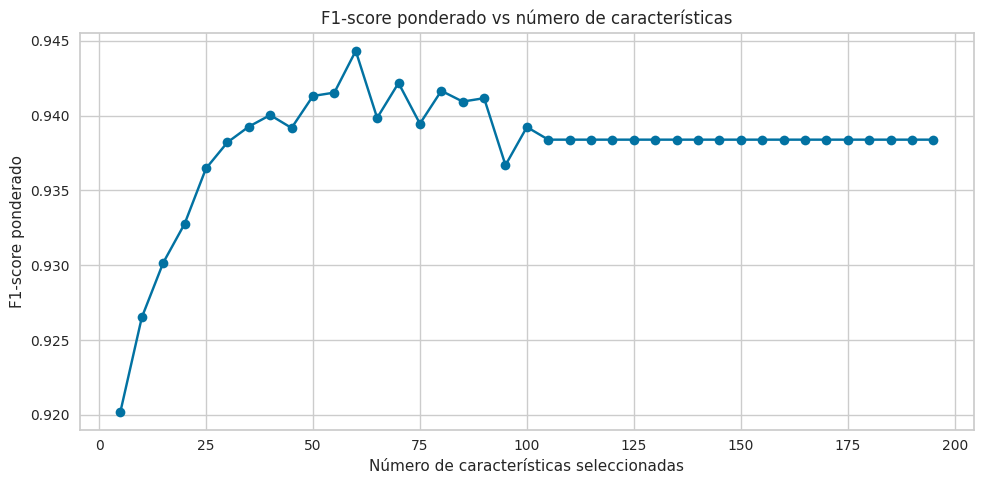

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

feature_names = pipeline_xgb.named_steps['preprocessing'].get_feature_names_out()
importances = xgb_model.feature_importances_

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Transformar todo el dataset para seleccionar columnas específicas
X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

f1_scores = []
num_features_list = list(range(5, len(feat_imp)+1, 5))  # evaluar en bloques de 5

for n in num_features_list:
    top_features = feat_imp.head(n)['feature'].values
    selected_indices = [i for i, f in enumerate(feature_names) if f in top_features]

    X_train_subset = X_train_transformed[:, selected_indices]
    X_test_subset = X_test_transformed[:, selected_indices]

    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)

    # Calcular F1 ponderado
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(num_features_list, f1_scores, marker='o')
plt.title("F1-score ponderado vs número de características")
plt.xlabel("Número de características seleccionadas")
plt.ylabel("F1-score ponderado")
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
f1_scores

[0.9202183703060866,
 0.926517741303456,
 0.9301684339429063,
 0.9327709851367099,
 0.9364709683690333,
 0.9382117006894322,
 0.9392633597698438,
 0.9400365545735521,
 0.9391751959955312,
 0.9413123725613487,
 0.9415392620288847,
 0.9443263055923831,
 0.9398468129388966,
 0.9421781771979681,
 0.9394602577949204,
 0.9416570117674796,
 0.9409386698908254,
 0.9411652991412102,
 0.9366907236769463,
 0.9392362925556761,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804,
 0.9383944891558804]

In [51]:
import numpy as np

f1_array = np.array(f1_scores)
max_f1 = f1_array.max()
max_f1_index = f1_array.argmax()
num_features_list[max_f1_index]
selected_features = feat_imp.head(num_features_list[max_f1_index])['feature'].values
(selected_features)


array(['num__Reactions', 'cat__Nationality_Peru',
       'cat__Nationality_China PR', 'cat__Nationality_Venezuela',
       'cat__Nationality_India', 'cat__Nationality_Egypt',
       'cat__Nationality_Bulgaria', 'cat__Nationality_Hungary',
       'cat__Nationality_Canada', 'cat__Nationality_South Africa',
       'cat__Nationality_Finland', 'cat__Nationality_Bolivia',
       'cat__Nationality_Slovenia', 'cat__Nationality_Switzerland',
       'cat__Nationality_Romania', 'cat__Nationality_Ecuador',
       'cat__Nationality_Greece', 'cat__Nationality_Cameroon',
       'cat__Nationality_Czech Republic', 'cat__Nationality_Paraguay',
       'cat__Nationality_Northern Ireland', 'cat__Nationality_Spain',
       'cat__Nationality_Brazil', 'cat__Nationality_Ivory Coast',
       'cat__Nationality_Norway', 'cat__Nationality_France',
       'cat__Nationality_Australia', 'cat__Nationality_Argentina',
       'cat__Nationality_Germany', 'cat__Nationality_England',
       'cat__Nationality_Italy', 'num__

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

**Respuesta**: 

In [ ]:
X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

all_feature_names = col_transformer.get_feature_names_out()

selected_indices = [i for i, name in enumerate(all_feature_names) if name in selected_features]

X_train_reduced = X_train_transformed[:, selected_indices]
X_test_reduced = X_test_transformed[:, selected_indices]

xgb_reduced = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_reduced.fit(X_train_reduced, y_train)

# Predecir y evaluar
y_pred_reduced = xgb_reduced.predict(X_test_reduced)
print("Modelo con características seleccionadas:")
print(classification_report(y_test, y_pred_reduced))


📊 Modelo con características seleccionadas:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.66      0.39      0.49       215

    accuracy                           0.95      3518
   macro avg       0.81      0.69      0.73      3518
weighted avg       0.94      0.95      0.94      3518




5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

  **Respuesta**:

  1. Si ambos modelos mantienen un rendimiento similar con un accuracy de un 95%. Sin embargo mejora ligeramente en las clases positiva pasando de 0.60 -> 0.66, recall 0.33 -> 0.39, F1-score 0.43 -> 0.49. Por tanto el modelo reducido mantiene el rendimiento general y mejora el desempeño en la clase de interes, siendo mejor que el modelo original.

  2. Simplicidad del modelo, mejra la interpretabilidad, menos riesog de sobreajuste, mejor uso de los recursos computacionales. 

  3. Si, al reducir el número de caracteristicas el modelo se vuelve mas simple de interpetar. Eliminar variables poco relevantes reduce la complejidad y evita que se caiga en explicaciones confusas y no significativas. DE haber dejado las demas variables se complejiza la relaciones de estas con la varible objetivo tanto para el publico tecnico como no tecnico.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [58]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

# Probabilidades antes de calibrar
y_prob_original = xgb_reduced.predict_proba(X_test_reduced)[:, 1]
brier_original = brier_score_loss(y_test, y_prob_original)

# Calibrar modelo con Isotonic
calibrated_model = CalibratedClassifierCV(estimator=xgb_reduced, method='isotonic', cv=5)
calibrated_model.fit(X_train_reduced, y_train)

# Probabilidades después de calibrar
y_prob_calibrated = calibrated_model.predict_proba(X_test_reduced)[:, 1]
brier_calibrated = brier_score_loss(y_test, y_prob_calibrated)

# Mostrar resultados
print(f"Brier Score antes de calibrar:  {brier_original:.4f}")
print(f"Brier Score después de calibrar: {brier_calibrated:.4f}")


Brier Score antes de calibrar:  0.0368
Brier Score después de calibrar: 0.0348


El Brier Score mide la precisión de las probabilidades predichas. Se interpreta como un error cuadrático medio entre las probabilidades predichas y las verdaderas etiquetas. Por tanto se aprecia una leve mejora dado que el valor disminuye a 0.0348.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>